In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sympy
from IPython.display import Image
from matplotlib import rc

In [2]:
labelsize = 14
figsize = (5, 4.5)
img_ext = "eps"
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
params = {
    'figure.figsize': figsize,
    # 'text.usetex' : True,
    'font.size' : 12,
    # 'font.family' : 'iopams',
    'axes.labelsize': labelsize,
    'legend.fontsize': 12,
    # 'text.latex.unicode': True,
}
plt.rcParams.update(params)

In [3]:
PATH = os.path.join("/home/lmolel/OneDrive/PhD/Figures/")

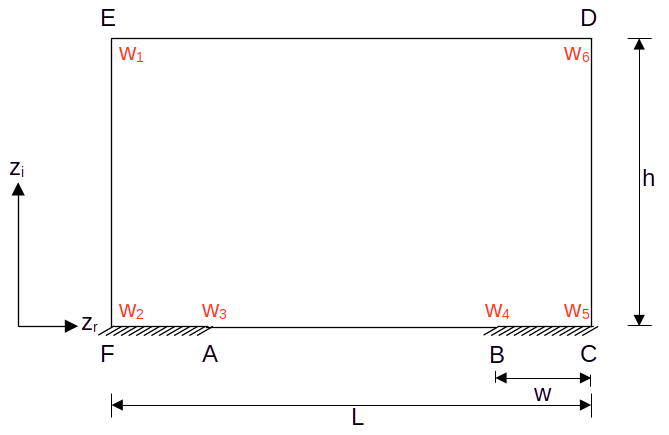

In [4]:
Image(filename=os.path.join(PATH, "conduit.png"))#, width=100, height=100)

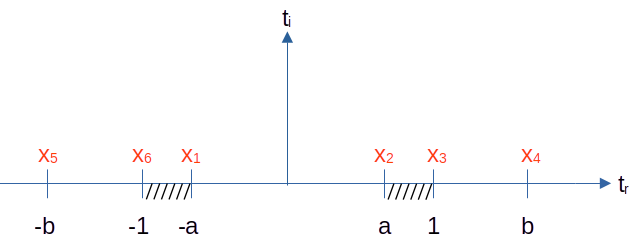

In [5]:
Image(filename=os.path.join(PATH, "conduit-mapping.png"))#, width=100, height=100)

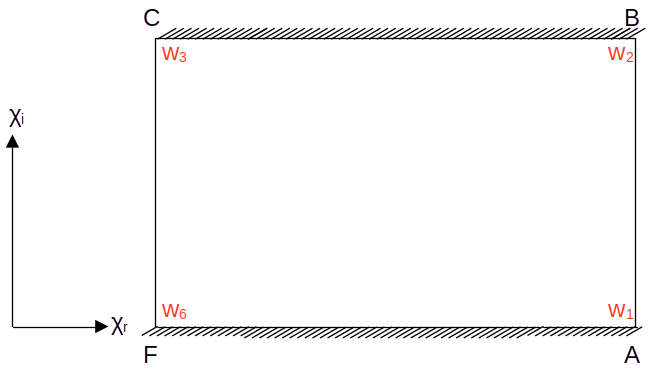

In [6]:
Image(filename=os.path.join(PATH, "conduit-2.png"))#, width=100, height=100)

## First Mapping

In the first mapping, we have:

\begin{equation*}
w = \int_{z_0}^z \frac{1}{(s + b)^{\frac{1}{2}} (s + 1)^{\frac{1}{2}} (s - b)^{\frac{1}{2}} (s - 1)^{\frac{1}{2}}}\mathrm{ds}
\end{equation*}

In the second mapping, we have:
\begin{equation*}
w = \int_{z_0}^z \frac{1}{(s + b)^{\frac{1}{2}} (s + a)^{\frac{1}{2}} (s - b)^{\frac{1}{2}} (s - a)^{\frac{1}{2}}}\mathrm{ds}
\end{equation*}

### Geometric ratios
\begin{equation*}
b = \frac{2H}{L}
\end{equation*}

\begin{equation*}
a = 1 - \frac{2w}{L}
\end{equation*}

In [7]:
def get_half_chi_re(a):
    lb = 0.5 * (1 + a)
    ub = 1
    x = sympy.Symbol('x', real=True)
    integ = sympy.Integral(1/((1 - x**2) * (x**2 - a**2)) ** 0.5, (x, lb, ub)).evalf()
    re = sympy.re(integ)
    im = sympy.im(integ)

    return re

def get_chi_im_max(a):
    x = sympy.Symbol('x', real=True)
    integ = sympy.Integral(1/((x**2 - 1) * (x**2 - a**2)) ** 0.5, (x, -1, 1)).evalf()
    re = sympy.re(integ)
    im = sympy.im(integ)

    return re

In [8]:
def Q(a, b):
    """
    Dimensionless flow rate
    """
    chi_im_max = get_chi_im_max(a)
    x = sympy.Symbol('x', real=True)
    integ = sympy.Integral((b**2 - x**2) ** 0.5 / (x**2 - a ** 2) ** 0.5, (x, a, 1)).evalf()
    re = sympy.re(integ)
    im = sympy.im(integ)

    return re / chi_im_max

In [9]:
def q(a, b, x):
    chi_im_max = get_chi_im_max(a)
    return (b**2 - x**2) ** 0.5 / (x**2 - a ** 2) ** 0.5 / chi_im_max

In [10]:
df = pd.read_csv("experimental/inlet-ratios.csv")
a_values = df['a'].to_numpy()

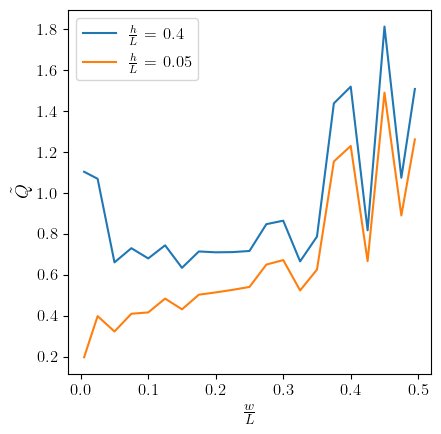

In [11]:
fig, ax = plt.subplots()
b_values = [1.171527310713338, 1.000000000000187]
h_over_L = [0.4, 0.05]
w_over_L = [0.5*(1 - a) for a in a_values]

for i, b in enumerate(b_values):
    q_values = [Q(a, b)/(1 - a) for a in a_values]
    ax.plot(w_over_L, q_values, label=r'$\frac{h}{L}$' + f' = {h_over_L[i]}')
ax.legend();
ax.set_box_aspect(1);
ax.set_xlabel(r'$\frac{w}{L}$');
ax.set_ylabel(r'$\tilde{Q}$');
ax.minorticks_on();
plt.tight_layout();

In [ ]:
eps = 1e-9
z_dist = np.linspace(a_values[0] - eps, 1, num=10001)
q_loc = [q(a_values[0], b_values[0], z) for z in z_dist]

/tmp/ipykernel_541991/1512500980.py:3: RuntimeWarning: invalid value encountered in scalar power
  return (b**2 - x**2) ** 0.5 / (x**2 - a ** 2) ** 0.5 / chi_im_max
/tmp/ipykernel_541991/1512500980.py:3: RuntimeWarning: invalid value encountered in divide
  return (b**2 - x**2) ** 0.5 / (x**2 - a ** 2) ** 0.5 / chi_im_max


In [ ]:
fig, ax = plt.subplots()
ax.plot(z_dist - a_values[0], q_loc);
# ax.legend();
ax.set_box_aspect(1);
ax.set_xlabel(r'$\Vert z - z*\Vert$');
ax.semilogx();
# ax.semilogy();
ax.minorticks_on()
ax.set_ylabel(r'$\tilde{q}$');
plt.tight_layout();